In [1]:
from IPython.display import display , Math , Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/iris


In [3]:
data = pd.read_csv(path + "/Iris.csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


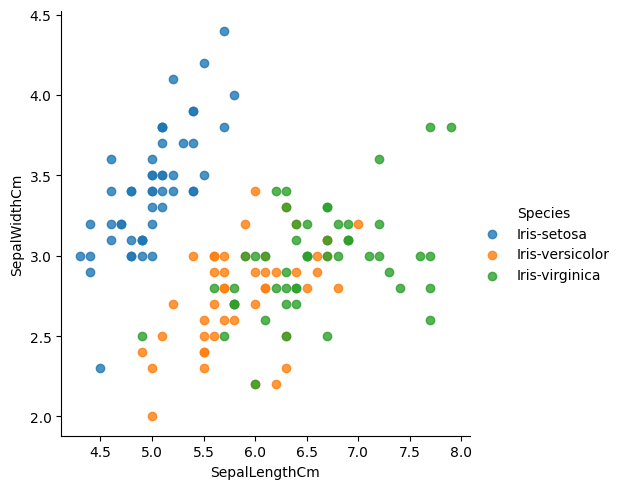

In [ ]:
sns.lmplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data , hue  ="Species", fit_reg= False )

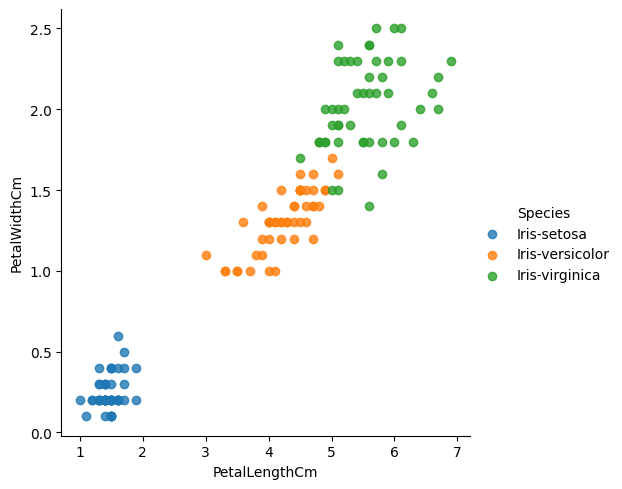

In [ ]:
sns.lmplot(x = "PetalLengthCm", y = "PetalWidthCm", data = data , hue  ="Species", fit_reg= False )

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Species_encoded'] = label_encoder.fit_transform(data['Species'])

In [ ]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
115,116,6.4,3.2,5.3,2.3,Iris-virginica,2
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,1
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
136,137,6.3,3.4,5.6,2.4,Iris-virginica,2
17,18,5.1,3.5,1.4,0.3,Iris-setosa,0
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,1
107,108,7.3,2.9,6.3,1.8,Iris-virginica,2


In [5]:
X = data.drop(['Id', 'Species', 'Species_encoded'], axis=1)
y = data['Species_encoded']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



using SVM model

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Using Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print(classification_report(y_test, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#if you want to use one_hot_encoding
data_encoded = pd.get_dummies(data, columns=['Species'])

In [10]:
import pickle
knn_model = knn
filename = 'knn_model.pkl'
with open(filename, 'wb') as f:
        pickle.dump(knn_model, f)